In [1]:
#%% Add to path
import sys
%cd ..

with open('python_paths.txt', 'r') as f:
    paths = f.read().splitlines()
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

        
print(sys.path)
print(sys.executable)

/media/theodore/HDD1/These/projets/superpixels
['/media/theodore/HDD1/These/projets/superpixels/Notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.7-linux-x86_64.egg', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/IPython/extensions', '/home/theodore/.ipython', '.']
/media/theodore/HDD1/Spondi/SpondiDetect/venv/bin/python3


In [2]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

import src.plotter as p
import src.superpixel_models.superpixel as sp
import src.superpixel_models.slic as slic
import src.superpixel_models.hiersup as hs

def reload_modules():
    for modl in [p, sp, slic, hs]:
        reload(modl)

reload_modules()

In [3]:
img_path = "./data/img.jpg"

img = plt.imread(img_path)
img = (img - img.min()) / (img.max() - img.min())

In [4]:
img_path = "./data/img_spondi.npy"

img = np.load(img_path)
img = (img - img.min()) / (img.max() - img.min())

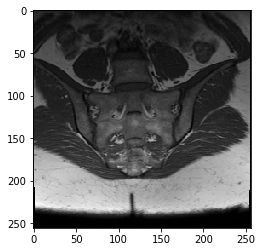

In [5]:
plt.imshow(img, cmap="gray")

# Slic

In [5]:
reload(slic)
model = slic.SLIC(K=100, m=.01, thresh=1, maxit=5)


In [11]:
%%time
model.fit(img, False)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 17.6 µs
Current iteration: 1 / 5. Error: 609.5244998310686
Current iteration: 2 / 5. Error: 225.39182623186133
Current iteration: 3 / 5. Error: 101.06489947271791
Current iteration: 4 / 5. Error: 41.47933379395827
Current iteration: 5 / 5. Error: 20.59969980111548


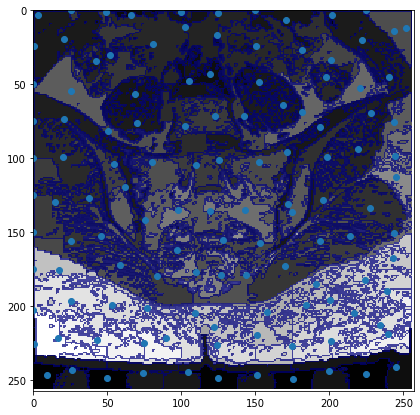

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
mask = model.pixel_labels
p.plot_img_mask_on_ax(ax, model.infer_superpixel_img(), model.infer_superpixel_edges())
ax.scatter(np.stack(model.centers)[:, 2], np.stack(model.centers)[:, 1])

ax.set_xlim(0, 257);
ax.set_ylim(257, 0);

(array([36., 28., 14., 11.,  6.,  2.,  3.,  8.,  9.,  4.]),
 array([0.        , 0.08556108, 0.17112217, 0.25668325, 0.34224433,
        0.42780541, 0.5133665 , 0.59892758, 0.68448866, 0.77004974,
        0.85561083]),
 <a list of 10 Patch objects>)

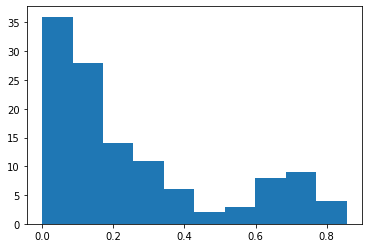

In [13]:
plt.hist(model.centers[:, 0])

(array([13574., 20220.,  9928.,  5973.,  2174.,  1411.,  4196.,  6051.,
         1794.,   215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

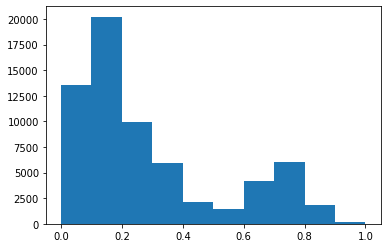

In [14]:
plt.hist(img[img==img])

In [59]:
im2 = model.infer_superpixel_img()

# My method

In [361]:
%%time
reload_modules()
sp1 = sp.SuperpixelImage(img, mask=mask)

CPU times: user 95.2 ms, sys: 81 µs, total: 95.3 ms
Wall time: 97 ms


In [363]:
%%time
sp1.compute_neighbors();

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.54 µs


{1: {0, 2, 12, 13},
 0: {1, 11, 12},
 2: {1, 3, 12, 13, 14},
 3: {2, 4, 12, 14, 15},
 4: {3, 5, 14, 15, 16, 27},
 5: {4, 6, 15, 16, 27},
 6: {5, 7, 16, 17},
 7: {6, 8, 16, 17, 18, 20, 30},
 8: {7, 9, 18, 20},
 9: {8, 10, 20, 21},
 10: {9, 21, 32},
 12: {0, 1, 2, 3, 11, 13, 14, 22, 23, 24, 25, 34},
 13: {1, 2, 12, 14, 23, 24, 35, 36},
 14: {2, 3, 4, 12, 13, 15, 16, 24, 25, 26, 27, 36, 37},
 15: {3, 4, 5, 14, 16, 17, 25, 26, 27},
 16: {4, 5, 6, 7, 14, 15, 17, 26, 27, 28, 39, 40},
 17: {6, 7, 15, 16, 18, 26, 27, 28, 30, 38, 39, 40},
 18: {7, 8, 17, 19, 20, 28, 29, 30, 40},
 20: {7, 8, 9, 18, 19, 21, 30, 32, 42},
 21: {9, 10, 19, 20, 31, 32, 43},
 19: {18, 20, 21, 29, 30, 31, 32, 40, 42},
 11: {0, 12, 22},
 24: {12, 13, 14, 23, 25, 34, 35, 36, 46},
 27: {4, 5, 14, 15, 16, 17, 26, 28, 38, 39, 40, 50},
 30: {7, 17, 18, 19, 20, 28, 29, 31, 32, 40, 41, 42, 43, 52, 53},
 32: {10, 19, 20, 21, 30, 31, 41, 42, 43, 53},
 28: {16, 17, 18, 26, 27, 30, 38, 39, 40, 41},
 26: {14, 15, 16, 17, 25, 27, 28

In [378]:
%%time
sp1.merge(0, 13, 0)

CPU times: user 6.12 ms, sys: 84 µs, total: 6.2 ms
Wall time: 5.64 ms


In [379]:
sp1._neighbors

{0: {0, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 30, 32, 34, 35, 36},
 14: {0, 15, 16, 24, 25, 26, 27, 36, 37},
 15: {0, 14, 16, 17, 25, 26, 27},
 16: {0, 14, 15, 17, 26, 27, 28, 39, 40},
 17: {0, 15, 16, 18, 26, 27, 28, 30, 38, 39, 40},
 18: {0, 17, 19, 20, 28, 29, 30, 40},
 20: {0, 18, 19, 21, 30, 32, 42},
 21: {0, 19, 20, 31, 32, 43},
 19: {18, 20, 21, 29, 30, 31, 32, 40, 42},
 24: {0, 14, 23, 25, 34, 35, 36, 46},
 27: {0, 14, 15, 16, 17, 26, 28, 38, 39, 40, 50},
 30: {0, 17, 18, 19, 20, 28, 29, 31, 32, 40, 41, 42, 43, 52, 53},
 32: {0, 19, 20, 21, 30, 31, 41, 42, 43, 53},
 28: {16, 17, 18, 26, 27, 30, 38, 39, 40, 41},
 26: {14, 15, 16, 17, 25, 27, 28, 36, 37, 39},
 25: {0, 14, 15, 24, 26, 34, 35, 36, 37},
 31: {19, 21, 29, 30, 32, 41, 42, 43},
 23: {0, 22, 24, 34, 35, 36, 46},
 29: {18, 19, 30, 31, 40, 41, 50, 51, 52, 53},
 22: {0, 23, 33, 34},
 40: {16, 17, 18, 19, 27, 28, 29, 30, 38, 39, 41, 49, 50, 51, 52, 53},
 42: {19, 20, 30, 31, 32, 41, 43, 52, 53},
 34: {0, 22, 23, 2

In [308]:
%%time
for _ in range(1000**2):
    if 1 > 2:
        print(1)
        

CPU times: user 69.9 ms, sys: 0 ns, total: 69.9 ms
Wall time: 67.7 ms


In [307]:
%%time
sp1.update_neighbors([1, 2])

CPU times: user 38.5 ms, sys: 58 µs, total: 38.5 ms
Wall time: 37.4 ms


{1: set(),
 0: {1, 2, 256},
 2: {0, 3, 257},
 3: {2, 4, 259},
 4: {3, 5, 260},
 5: {4, 6, 261},
 6: {5, 7, 262},
 7: {6, 8, 263},
 8: {7, 9, 264},
 9: {8, 10, 265},
 10: {9, 11, 266},
 11: {10, 12, 267},
 12: {11, 13, 268},
 13: {12, 14, 269},
 14: {13, 15, 270},
 15: {14, 16, 271},
 16: {15, 17, 272},
 17: {16, 18, 273},
 18: {17, 19, 274},
 19: {18, 20, 275},
 20: {19, 21, 276},
 21: {20, 22, 277},
 22: {21, 23, 278},
 23: {22, 24, 279},
 24: {23, 25, 280},
 25: {24, 26, 281},
 26: {25, 27, 282},
 27: {26, 28, 283},
 28: {27, 29, 284},
 29: {28, 30, 285},
 30: {29, 31, 286},
 31: {30, 32, 287},
 32: {31, 33, 288},
 33: {32, 34, 289},
 34: {33, 35, 290},
 35: {34, 36, 291},
 36: {35, 37, 292},
 37: {36, 38, 293},
 38: {37, 39, 294},
 39: {38, 40, 295},
 40: {39, 41, 296},
 41: {40, 42, 297},
 42: {41, 43, 298},
 43: {42, 44, 299},
 44: {43, 45, 300},
 45: {44, 46, 301},
 46: {45, 47, 302},
 47: {46, 48, 303},
 48: {47, 49, 304},
 49: {48, 50, 305},
 50: {49, 51, 306},
 51: {50, 52, 30

In [303]:
%%time
sp1.array_label

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.82 µs


array([[    0,     1,     2, ...,   253,   254,   255],
       [  256,   257,   258, ...,   509,   510,   511],
       [  512,   513,   514, ...,   765,   766,   767],
       ...,
       [64768, 64769, 64770, ..., 65021, 65022, 65023],
       [65024, 65025, 65026, ..., 65277, 65278, 65279],
       [65280, 65281, 65282, ..., 65533, 65534, 65535]])

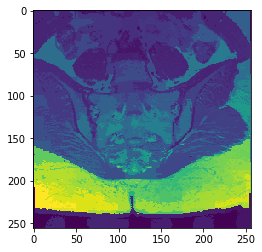

In [48]:
pix_lab = sp1.array_means
plt.imshow(pix_lab)

In [310]:
%%time
sp1.merge(10, 11)

CPU times: user 214 µs, sys: 0 ns, total: 214 µs
Wall time: 227 µs


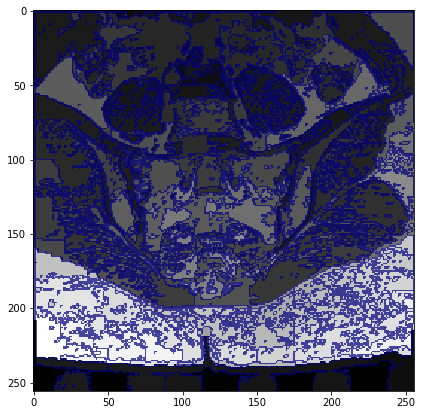

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
p.plot_img_mask_on_ax(ax, sp1.array_means, sp1.infer_superpixel_edges())

In [75]:
%%time
sp1.compute_neighbors()

CPU times: user 451 ms, sys: 12.3 ms, total: 463 ms
Wall time: 466 ms


<src.superpixel_models.superpixel.SuperpixelImage object at 0x7f6ac8f43090 (65536 superpixels)>

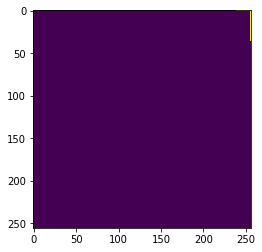

In [71]:
plt.imshow(mask == 10)

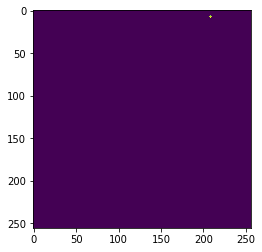

In [79]:
lb = 2000
ar1 = sp1.array_some_sp([lb] + list(sp1.neighbors[lb]))
plt.imshow(ar1)

In [168]:
import functools

def record_state(fn):

    @functools.wraps(fn)
    def wrapper(*args, **kwargs):
        if args[0].value != wrapper.value:
            print(f'Recomputing: self.value {args[0].value} != fn.value {wrapper.value}')
            wrapper.value = args[0].value
            return fn(*args, **kwargs)
        else:
            print(f'Computed: self.value {args[0].value} == fn.value {wrapper.value}')
            att = getattr(args[0], '_' + fn.__name__)
            setattr(args[0], '_' + fn.__name__, att)
            return att
    wrapper.value = 0
    return wrapper

In [169]:
class A:
    
    def __init__(self):
        self.value = 0
        self._f = 'banane flambée'

    @record_state
    def f(self, x):
        return x

In [170]:
a = A()

In [172]:
a.value = 3

In [173]:
a.f("azeazea")

Recomputing: self.value 3 != fn.value 0


'azeazea'

In [158]:
a.f.value

1

In [106]:
a.f(1)

1

In [94]:
a = A()
a.f.value

0

In [95]:
a.f.__dict__

{'value': 0}

In [97]:
a.f.__dict__['value'] = 1

In [98]:
a.f.value

1